In [1]:
# import all libraries in this cell
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import (
    train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
)


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, 
    roc_curve,classification_report,accuracy_score,precision_recall_curve
)
from sklearn.metrics import auc as sk_auc


from sklearn.pipeline import Pipeline

from sklearn.base import clone


import time
from pympler import asizeof
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import randint, uniform




Source : https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset


# Breast Cancer Dataset — Variable Descriptions

The dataset contains diagnostic features computed from digitized images of fine-needle aspirate (FNA) breast mass samples.  
Each feature describes properties of cell nuclei such as size, texture, smoothness, and shape irregularity.

## Target Variable
- **`diagnosis`**  
  Clinical diagnosis of the tumor:
  - **M** = Malignant  
  - **B** = Benign  

---

## Structure of Features

Each morphological feature appears in three forms:

| Suffix       | Meaning                                                       |
|--------------|---------------------------------------------------------------|
| `_mean`      | Mean value of the feature                                     |
| `_se`        | Standard error (variation) of the feature                     |
| `_worst`     | Worst/largest value (mean of the 3 largest nuclei)            |

There are **10 main feature groups**, each with mean, SE, and worst versions.

---

## Feature-by-Feature Meaning

### 1. **Radius**
- **`radius_mean`**, **`radius_se`**, **`radius_worst`**  
  Average distance from center to perimeter. Indicates overall tumor size.

### 2. **Texture**
- **`texture_mean`**, **`texture_se`**, **`texture_worst`**  
  Standard deviation of gray-level pixel intensities. Measures smoothness vs roughness.

### 3. **Perimeter**
- **`perimeter_mean`**, **`perimeter_se`**, **`perimeter_worst`**  
  Length of the tumor boundary.

### 4. **Area**
- **`area_mean`**, **`area_se`**, **`area_worst`**  
  Area of the cell nuclei. Larger area often indicates malignancy.

### 5. **Smoothness**
- **`smoothness_mean`**, **`smoothness_se`**, **`smoothness_worst`**  
  Local variation of radius lengths. Lower smoothness = more irregular boundaries.

### 6. **Compactness**
- **`compactness_mean`**, **`compactness_se`**, **`compactness_worst`**  
  Formula: `(Perimeter² / Area) - 1`  
  Indicates how compact or spread out the shape is.

### 7. **Concavity**
- **`concavity_mean`**, **`concavity_se`**, **`concavity_worst`**  
  Severity/depth of concave portions of the contour.

### 8. **Concave Points**
- **`concave_points_mean`**, **`concave_points_se`**, **`concave_points_worst`**  
  Number of distinct concave regions on the contour.  
  One of the strongest predictors of malignancy.

### 9. **Symmetry**
- **`symmetry_mean`**, **`symmetry_se`**, **`symmetry_worst`**  
  Symmetry of the cell nucleus shape.

### 10. **Fractal Dimension**
- **`fractal_dimension_mean`**, **`fractal_dimension_se`**, **`fractal_dimension_worst`**  
  Complexity/roughness of the contour. Higher values = more irregular shapes.

---

## Additional Column

### **`id`**
Unique identifier for each patient sample (not used for machine learning).



In [2]:
df=pd.read_csv("breast_cancer_v2.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory data analysis

In [4]:
print("Shape:", df.shape)
print("\n--- DATA TYPES ---")
print(df.dtypes)
print("\n--- MISSING VALUES ---")
print(df.isna().sum())
print("\nDuplicate rows:", df.duplicated().sum())

Shape: (569, 32)

--- DATA TYPES ---
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst 


--- TARGET VARIABLE (diagnosis) ---
diagnosis
B    357
M    212
Name: count, dtype: int64
diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ambratis\AppData\Local\Temp\ipykernel_8456\2188078523.py:11: SyntaxWarning: invalid escape sequence '\d'
  plt.savefig("presentation\diagnosis.png")
C:\Users\Ambratis\AppData\Local\Temp\ipykernel_8456\2188078523.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="diagnosis", palette="coolwarm")
C:\Users\Ambratis\AppData\Local\Temp\ipykernel_8456\2188078523.py:11: SyntaxWarning: invalid escape sequence '\d'
  plt.savefig("presentation\diagnosis.png")


FileNotFoundError: [Errno 2] No such file or directory: 'presentation\\diagnosis.png'

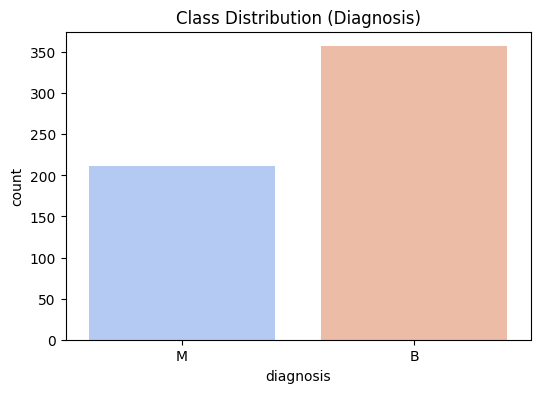

In [5]:
# ----------------------------
# Target variable exploration
# ----------------------------
print("\n--- TARGET VARIABLE (diagnosis) ---")
print(df["diagnosis"].value_counts())
print(df["diagnosis"].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="diagnosis", palette="coolwarm")
plt.title("Class Distribution (Diagnosis)")
plt.savefig("presentation\diagnosis.png")
plt.show()


In [ ]:
# ----------------------------
# Summary statistics
# ----------------------------
print("\n--- SUMMARY STATISTICS ---")
print(df.describe())


--- SUMMARY STATISTICS ---
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.0

In [ ]:
# ----------------------------
# Encode the diagnosis column
# ----------------------------
df["diagnosis_encoded"] = df["diagnosis"].map({"M": 1, "B": 0})

<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Ambratis\AppData\Local\Temp\ipykernel_13252\3128584572.py:8: SyntaxWarning: invalid escape sequence '\c'
  plt.savefig("presentation\corr_heatmap.png")


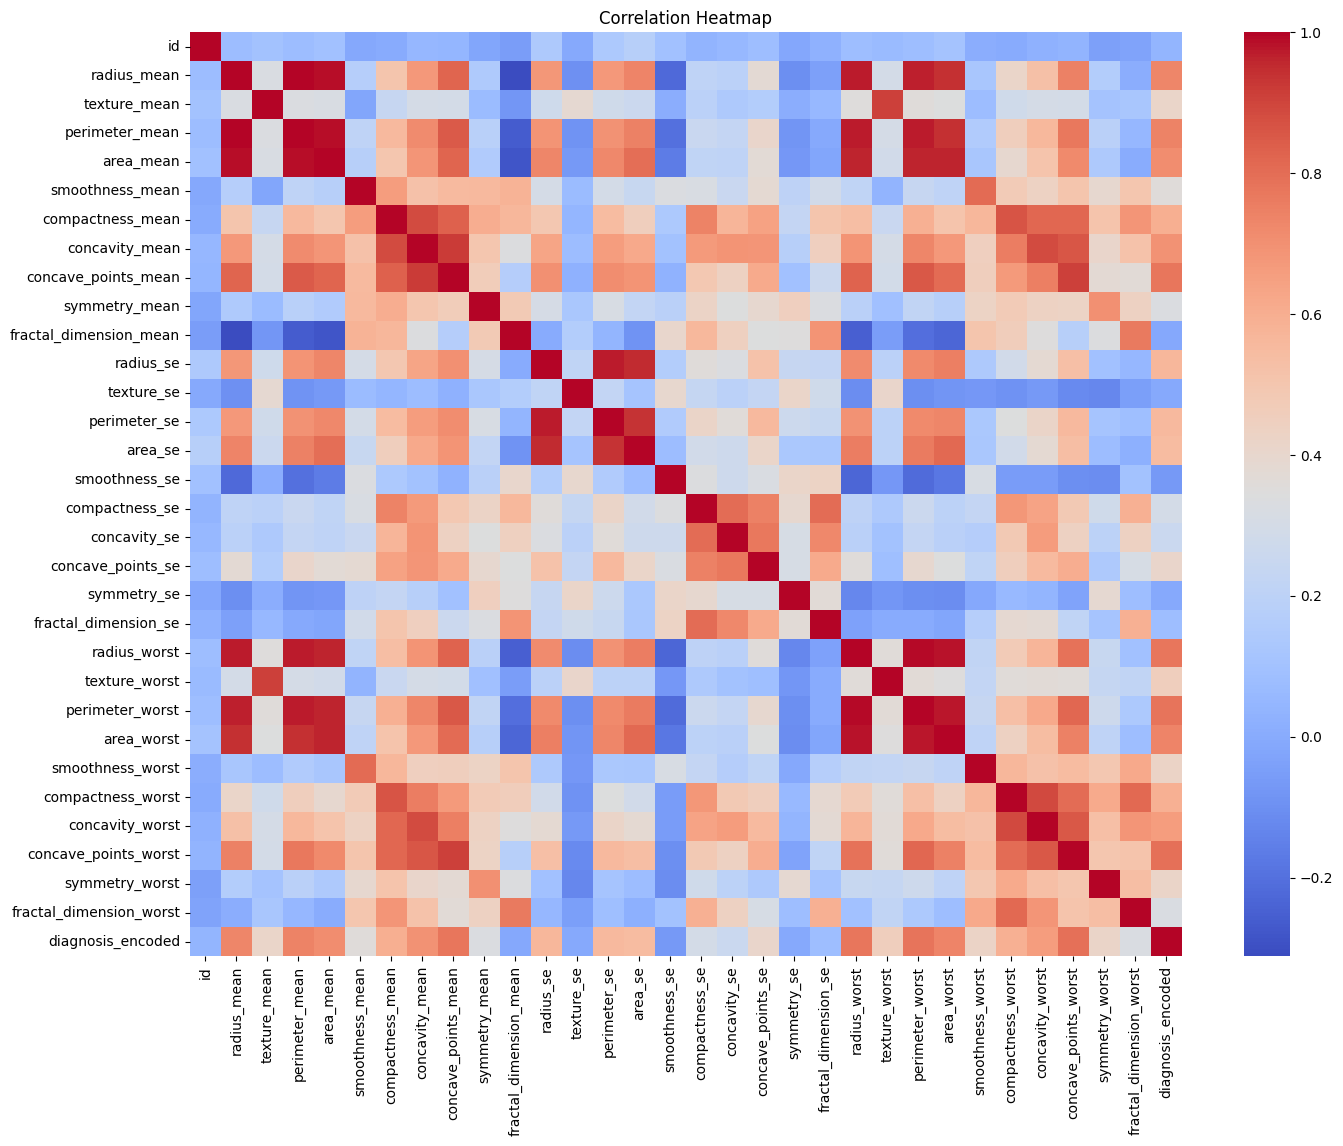

In [ ]:
# ----------------------------
# Correlation Matrix
# ----------------------------
plt.figure(figsize=(16, 12))
corr = df.drop('diagnosis',axis=1).corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.savefig("presentation\corr_heatmap.png")
plt.show()

In [ ]:
# Top correlations with the target
print("\n--- TOP CORRELATIONS WITH DIAGNOSIS ---")
print(corr["diagnosis_encoded"].sort_values(ascending=False).head(10))


--- TOP CORRELATIONS WITH DIAGNOSIS ---
diagnosis_encoded       1.000000
concave_points_worst    0.793566
perimeter_worst         0.782914
concave_points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis_encoded, dtype: float64


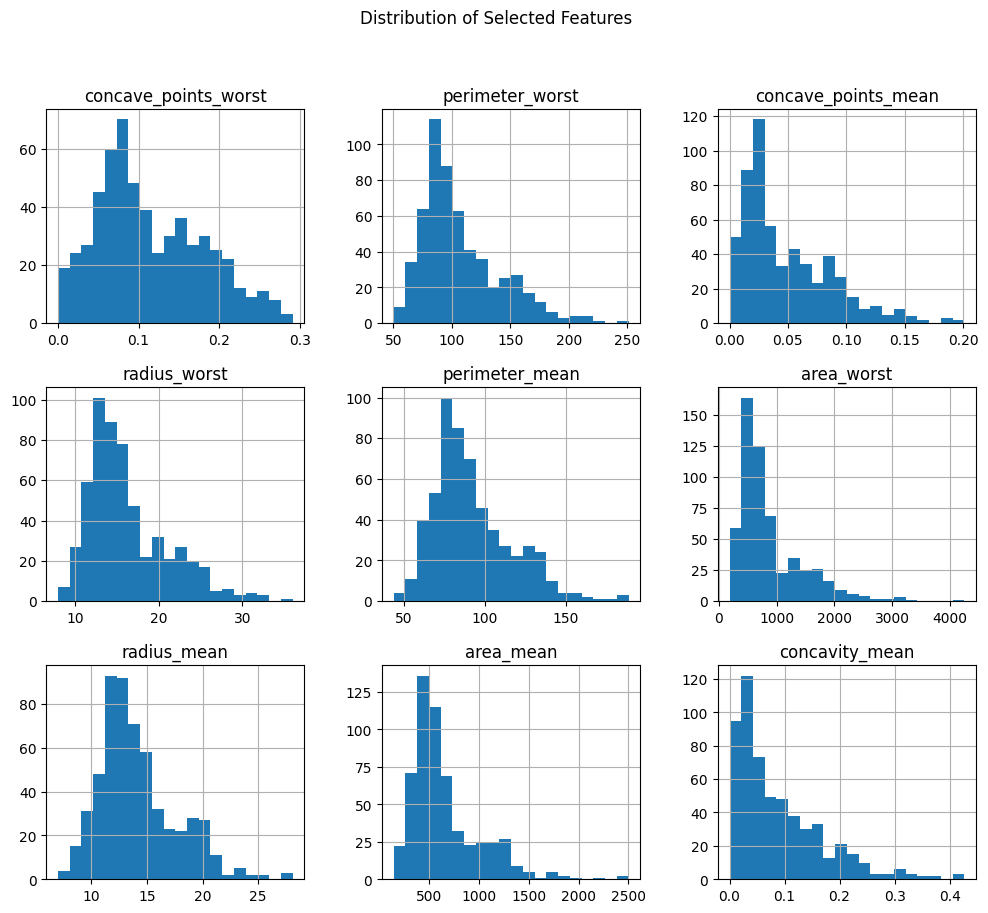

In [ ]:
# ----------------------------
# Distribution of main features
# ----------------------------
main_features = [
    "concave_points_worst", "perimeter_worst", "concave_points_mean", "radius_worst",
    "perimeter_mean", "area_worst","radius_mean","area_mean","concavity_mean"
]

df[main_features].hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Selected Features")
plt.show()


C:\Users\Ambratis\AppData\Local\Temp\ipykernel_13252\2265518228.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="diagnosis", y="radius_mean", palette="coolwarm")


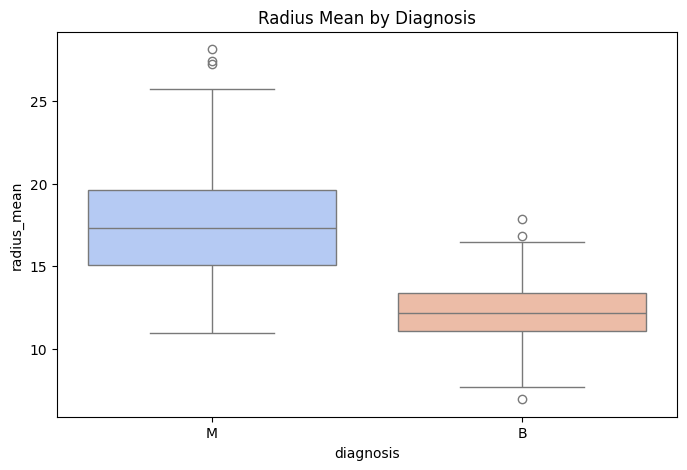

C:\Users\Ambratis\AppData\Local\Temp\ipykernel_13252\2265518228.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="diagnosis", y="area_mean", palette="coolwarm")


OSError: [Errno 22] Invalid argument: 'presentation\x08oxplot.png'

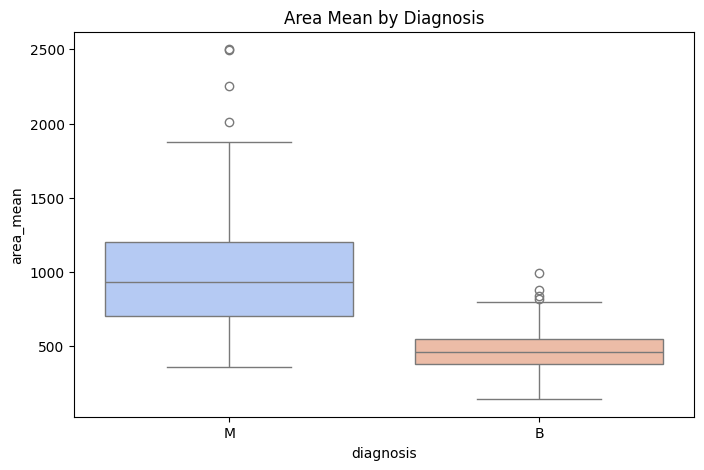

In [ ]:
# ----------------------------
# Boxplots for comparison by class
# ----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="diagnosis", y="radius_mean", palette="coolwarm")
plt.title("Radius Mean by Diagnosis")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="diagnosis", y="area_mean", palette="coolwarm")
plt.title("Area Mean by Diagnosis")
plt.savefig("presentation\boxplot.png")
plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Ambratis\AppData\Local\Temp\ipykernel_21204\3365930852.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig("presentation\scatter_plot.png")


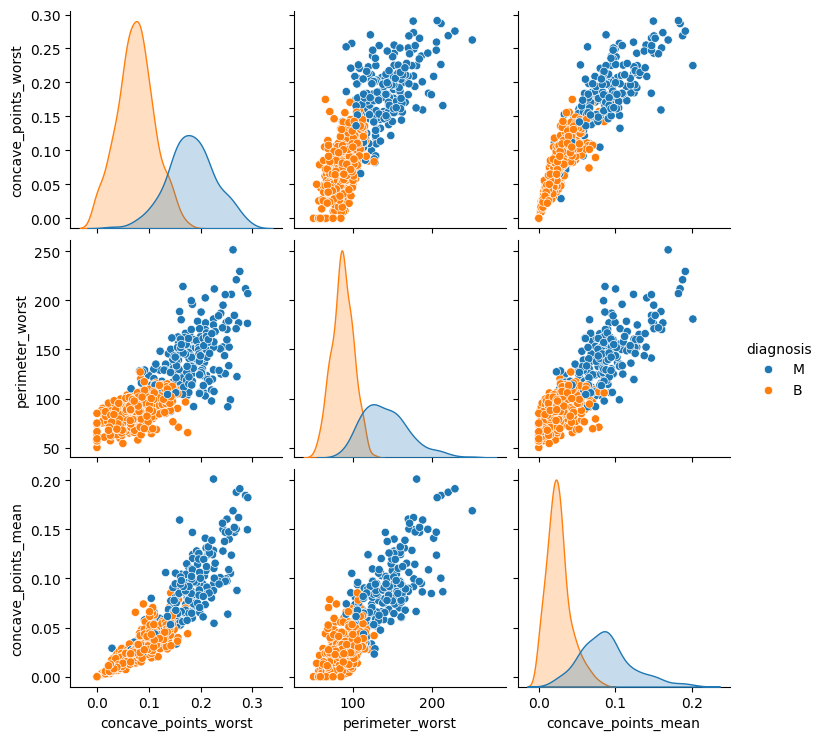

In [ ]:
# ----------------------------
# Pairplot (computationally heavy)
# ----------------------------
subset = df[["concave_points_worst", "perimeter_worst", "concave_points_mean","diagnosis"]]
sns.pairplot(subset, hue="diagnosis", diag_kind="kde")
plt.savefig("presentation\scatter_plot.png")
plt.show()

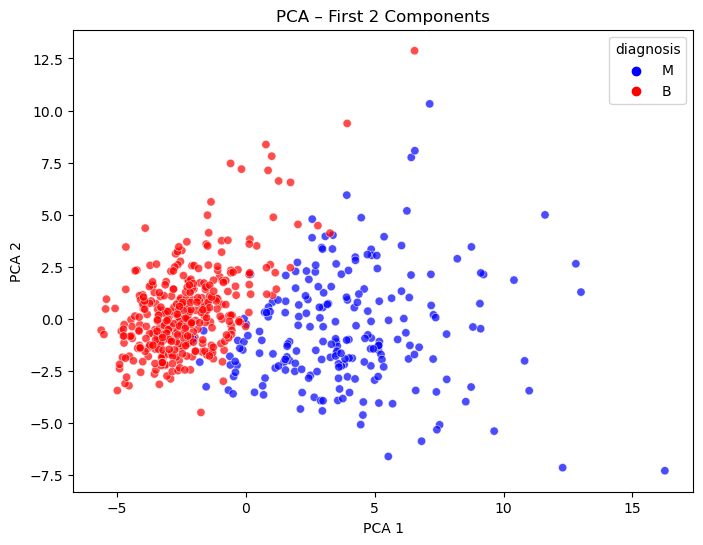

In [ ]:
# ----------------------------
# PCA Visualization
# ----------------------------

features = df.drop(columns=["id", "diagnosis"]).columns
X = df[features]
y = df["diagnosis"]

# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=y, palette=["blue","red"], alpha=0.7
)
plt.title("PCA – First 2 Components")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.savefig("presentation\pca_first2.png")
plt.show()

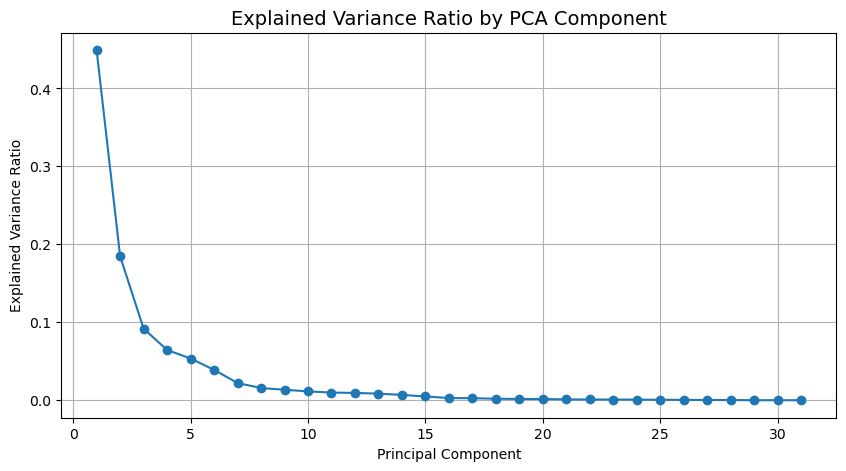

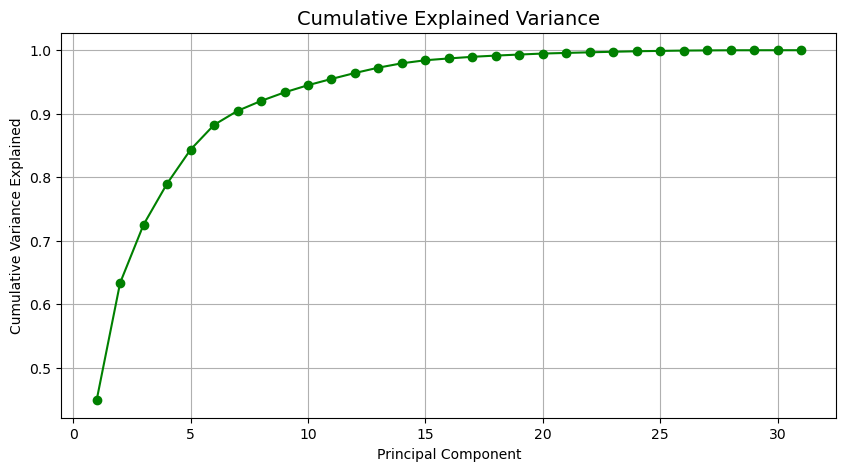

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# ===============================
# Plot: Explained Variance Ratio
# ===============================
plt.figure(figsize=(10,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title("Explained Variance Ratio by PCA Component", fontsize=14)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

# ===============================
# Plot: Cumulative Explained Variance
# ===============================
plt.figure(figsize=(10,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='green')
plt.title("Cumulative Explained Variance", fontsize=14)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.savefig("presentation\pca_cum_var.png")
plt.show()


## Preprocessing pipeline

In [ ]:
# ============================
#    PREPROCESSING PIPELINE
# ============================
df=pd.read_csv("breast_cancer_v2.csv")

# 1. Drop ID column
df = df.drop(columns=["id"])

# 2. Encode diagnosis
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# 3. Split X and y
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Shapes
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


Train shape: (455, 30)
Test shape: (114, 30)


## Train classification models

In [ ]:
# --------------------------
# Define all models
# --------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(30,15), max_iter=1000, random_state=42)
}

# --------------------------
# Train & evaluate each model
# --------------------------

results = []
conf_matrices = {}
roc_data = {}

for name,model in models.items():

    # Models requiring scaling
    if name in ["Logistic Regression", "SVM (RBF)", "KNN (k=5)", "Neural Network"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        probs = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        probs = model.predict_proba(X_test)[:,1]

    # Metrics
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc_auc_val = roc_auc_score(y_test, probs)

    results.append([name, acc, prec, rec, f1, roc_auc_val])

    # Store confusion matrix + ROC data
    conf_matrices[name] = confusion_matrix(y_test, preds)
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_data[name] = (fpr, tpr, sk_auc(fpr, tpr))


# Display comparison table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"])
print("\n========== MODEL PERFORMANCE COMPARISON ==========\n")
print(results_df.sort_values(by="Accuracy", ascending=False))



========== MODEL PERFORMANCE COMPARISON ==========

                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
1            SVM (RBF)  0.973684   1.000000  0.928571  0.962963  0.994709
0  Logistic Regression  0.964912   0.975000  0.928571  0.951220  0.996032
4        Random Forest  0.964912   1.000000  0.904762  0.950000  0.994213
6       Neural Network  0.964912   1.000000  0.904762  0.950000  0.995701
2            KNN (k=5)  0.956140   0.974359  0.904762  0.938272  0.982308
5          Naive Bayes  0.938596   1.000000  0.833333  0.909091  0.993386
3        Decision Tree  0.929825   0.904762  0.904762  0.904762  0.924603


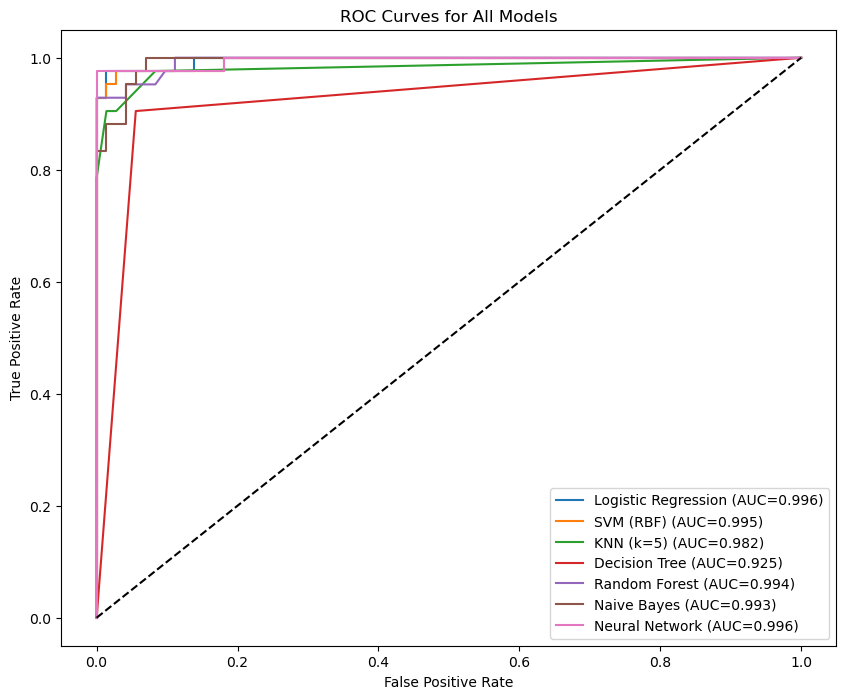

In [ ]:
# ===============================================================
#   ROC CURVES FOR ALL MODELS
# ===============================================================

plt.figure(figsize=(10,8))

for name, (fpr, tpr, roc_auc_val) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_val:.3f})")

plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.savefig("presentation/roc_curve.png")
plt.show()

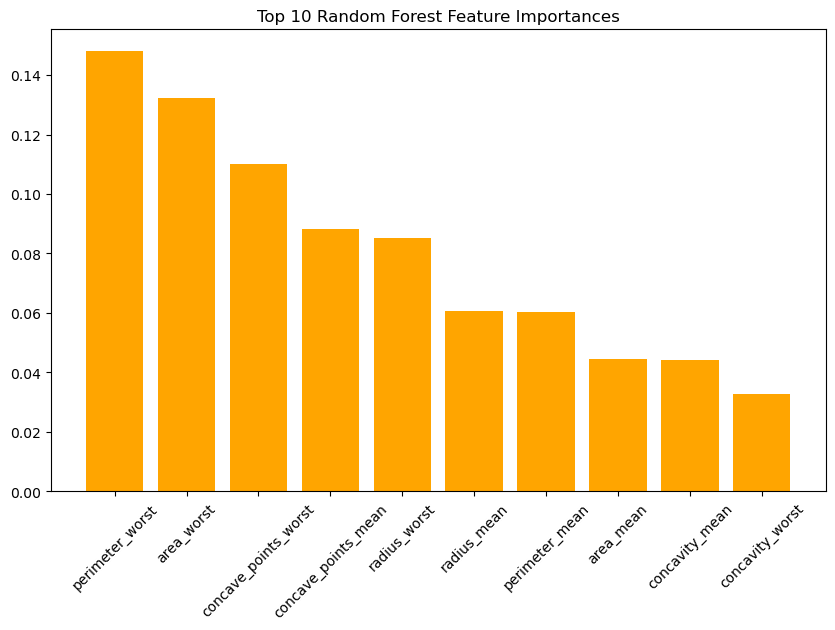

In [ ]:
# ===============================================================
#   FEATURE IMPORTANCE (RANDOM FOREST)
# ===============================================================

rf = models["Random Forest"]
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Top 10 Random Forest Feature Importances")
plt.bar(range(10), importances[indices][:10], color="orange")
plt.xticks(range(10), X.columns[indices][:10], rotation=45)
plt.savefig("presentation/top_10_rf.png")
plt.show()

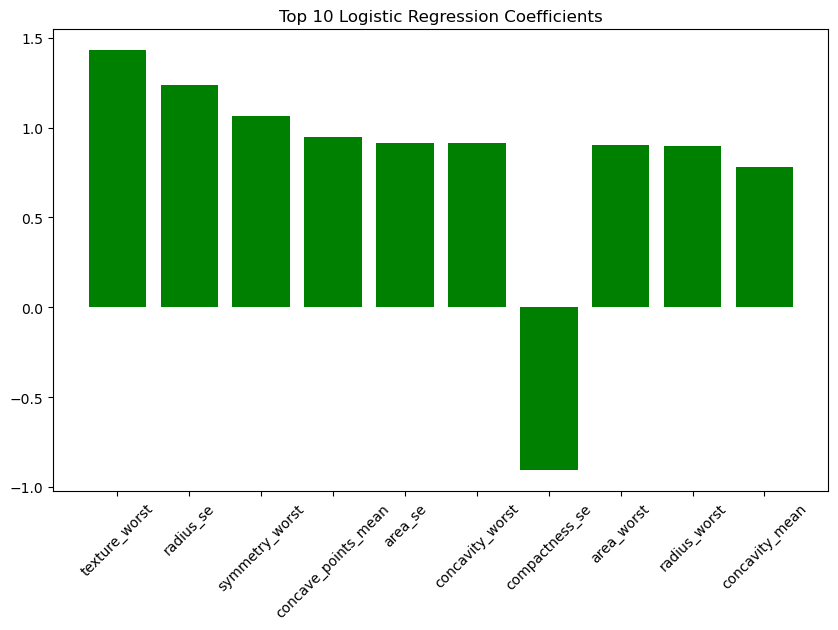

In [ ]:
# ===============================================================
#   LOGISTIC REGRESSION COEFFICIENTS
# ===============================================================

lr = models["Logistic Regression"]
lr.fit(X_train_scaled, y_train)

coef = lr.coef_[0]
indices = np.argsort(np.abs(coef))[::-1]

plt.figure(figsize=(10,6))
plt.title("Top 10 Logistic Regression Coefficients")
plt.bar(range(10), coef[indices][:10], color="green")
plt.xticks(range(10), X.columns[indices][:10], rotation=45)
plt.savefig("presentation/top_10_lr.png")
plt.show()

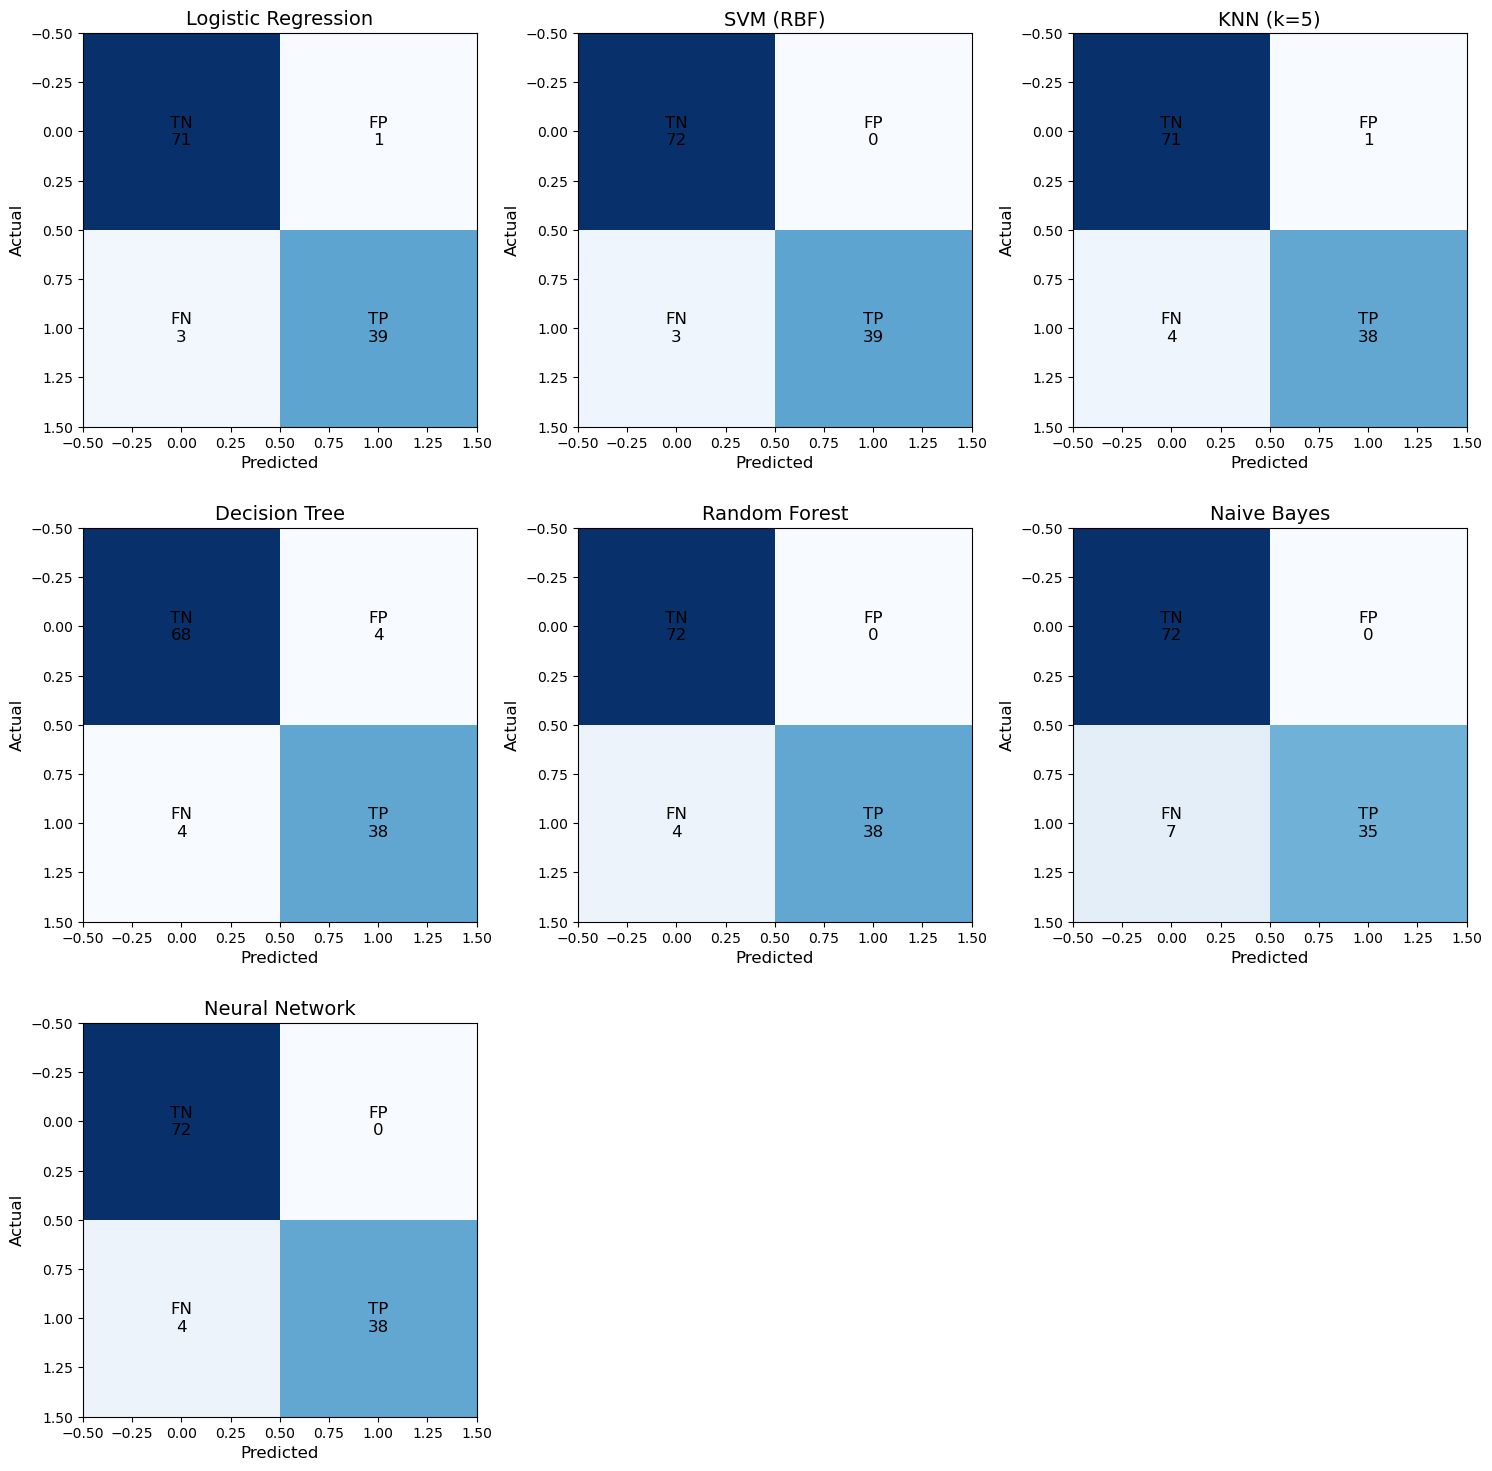

In [ ]:
# =======================================================
# CONFUSION MATRICES WITH LABELS (TN, FP, FN, TP)
# =======================================================

# Label grid for TN, FP, FN, TP
label_matrix = np.array([["TN", "FP"],
                         ["FN", "TP"]])

fig, axes = plt.subplots(3, 3, figsize=(15,15))
axes = axes.ravel()

for idx, (name, cm) in enumerate(conf_matrices.items()):
    ax = axes[idx]
    ax.imshow(cm, cmap="Blues")

    ax.set_title(name, fontsize=14)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("Actual", fontsize=12)

    # Show both label + value inside each cell
    for i in range(2):
        for j in range(2):
            ax.text(j, i,
                    f"{label_matrix[i, j]}\n{cm[i,j]}",
                    ha="center", va="center", fontsize=12)

# If fewer than 9 models, hide extra subplots
for i in range(len(conf_matrices), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.savefig("presentation/confusion_matrix.png")
plt.show()


# Computational cost comparison


========== MODEL TRAINING TIME COMPARISON ==========

                     Training Time (s)
KNN (k=5)                     0.000000
Naive Bayes                   0.000000
Decision Tree                 0.007999
Logistic Regression           0.012876
SVM (RBF)                     0.017442
Neural Network                0.312036
Random Forest                 0.409570


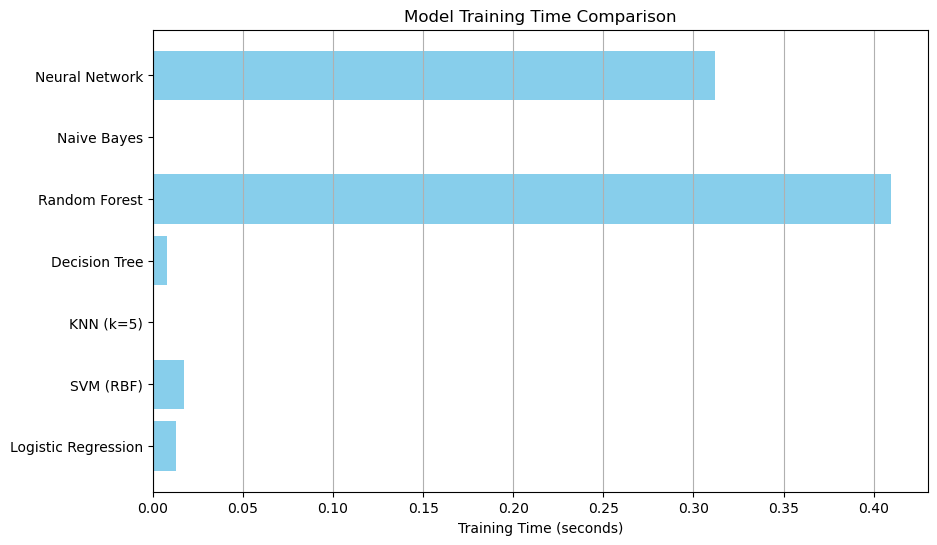

In [ ]:


# ============================
# Define Models
# ============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(30,15), max_iter=1000, random_state=42)
}

# ============================
# Measure Training Times
# ============================
training_times = {}

for name, model in models.items():

    # Use scaled data for certain models
    if name in ["Logistic Regression", "SVM (RBF)", "KNN (k=5)", "Neural Network","Naive Bayes"]:
        Xtr = X_train_scaled
        Xte = X_test_scaled
    else:
        Xtr = X_train
        Xte = X_test

    start = time.time()
    model.fit(Xtr, y_train)
    end = time.time()

    training_times[name] = end - start

# ============================
# Display Training Time Table
# ============================
time_df = pd.DataFrame.from_dict(training_times, orient="index", columns=["Training Time (s)"])
print("\n========== MODEL TRAINING TIME COMPARISON ==========\n")
print(time_df.sort_values(by="Training Time (s)"))

# ============================
# Plot Training Times
# ============================
plt.figure(figsize=(10,6))
plt.barh(time_df.index, time_df["Training Time (s)"], color='skyblue')
plt.xlabel("Training Time (seconds)")
plt.title("Model Training Time Comparison")
plt.grid(axis='x')
plt.savefig("presentation/training_time.png")
plt.show()


In [ ]:


prediction_times = {}

for name, model in models.items():

    # pick correct data (scaled or not)
    if name in ["Logistic Regression", "SVM (RBF)", "KNN (k=5)", "Neural Network","Naive Bayes"]:
        Xte = X_test_scaled
    else:
        Xte = X_test

    start = time.time()
    model.predict(Xte)
    end = time.time()

    prediction_times[name] = end - start

# Display results
pred_df = pd.DataFrame.from_dict(prediction_times, orient="index",
                                 columns=["Prediction Time (s)"])
print("\n========== MODEL PREDICTION TIME COMPARISON ==========\n")
print(pred_df.sort_values(by="Prediction Time (s)"))



========== MODEL PREDICTION TIME COMPARISON ==========

                     Prediction Time (s)
Naive Bayes                     0.000000
Neural Network                  0.000000
Logistic Regression             0.001003
SVM (RBF)                       0.001995
Decision Tree                   0.003271
Random Forest                   0.012552
KNN (k=5)                       0.116183


In [ ]:


complexity = {}

for name, model in models.items():
    if name == "Logistic Regression":
        params = model.coef_.size
    elif name == "SVM (RBF)":
        params = len(model.support_vectors_)
    elif name == "KNN (k=5)":
        params = len(X_train_scaled)   # lazy learner
    elif name == "Decision Tree":
        params = model.tree_.node_count
    elif name == "Random Forest":
        params = sum(t.tree_.node_count for t in model.estimators_)
    elif name == "Naive Bayes":
        params = model.theta_.size
    elif name == "Neural Network":
        params = sum(w.size for w in model.coefs_)  # total weights

    complexity[name] = params

complexity_df = pd.DataFrame.from_dict(complexity, orient="index",
                                       columns=["Model Complexity (parameters)"])

print("\n========== MODEL COMPLEXITY COMPARISON ==========\n")
print(complexity_df.sort_values(by="Model Complexity (parameters)"))



========== MODEL COMPLEXITY COMPARISON ==========

                     Model Complexity (parameters)
Logistic Regression                             30
Decision Tree                                   47
Naive Bayes                                     60
SVM (RBF)                                      107
KNN (k=5)                                      455
Neural Network                                1365
Random Forest                                 7234


In [ ]:


true_memory_usage = {}

for name, model in models.items():
    size_bytes = asizeof.asizeof(model)       # full recursive size
    size_kb = size_bytes / 1024
    size_mb = size_kb / 1024
    true_memory_usage[name] = size_mb

memory_true_df = pd.DataFrame.from_dict(
    true_memory_usage, orient="index",
    columns=["Memory Usage (MB)"]
)

print("\n========== TRUE MEMORY USAGE (RECURSIVE) ==========\n")
print(memory_true_df.sort_values(by="Memory Usage (MB)"))




========== TRUE MEMORY USAGE (RECURSIVE) ==========

                     Memory Usage (MB)
Naive Bayes                   0.002510
Decision Tree                 0.002708
Logistic Regression           0.002960
SVM (RBF)                     0.030945
Neural Network                0.050034
KNN (k=5)                     0.110115
Random Forest                 0.193382


In [ ]:
summary = pd.concat([time_df,
                     pred_df,
                     complexity_df,
                     memory_true_df], axis=1)

print("\n================ FINAL MODEL SUMMARY TABLE ================\n")
print(summary.sort_values(by="Training Time (s)"))



================ FINAL MODEL SUMMARY TABLE ================

                     Training Time (s)  Prediction Time (s)  \
KNN (k=5)                     0.000000             0.116183   
Naive Bayes                   0.000000             0.000000   
Decision Tree                 0.007999             0.003271   
Logistic Regression           0.012876             0.001003   
SVM (RBF)                     0.017442             0.001995   
Neural Network                0.312036             0.000000   
Random Forest                 0.409570             0.012552   

                     Model Complexity (parameters)  Memory Usage (MB)  
KNN (k=5)                                      455           0.110115  
Naive Bayes                                     60           0.002510  
Decision Tree                                   47           0.002708  
Logistic Regression                             30           0.002960  
SVM (RBF)                                      107           0.030945  
N

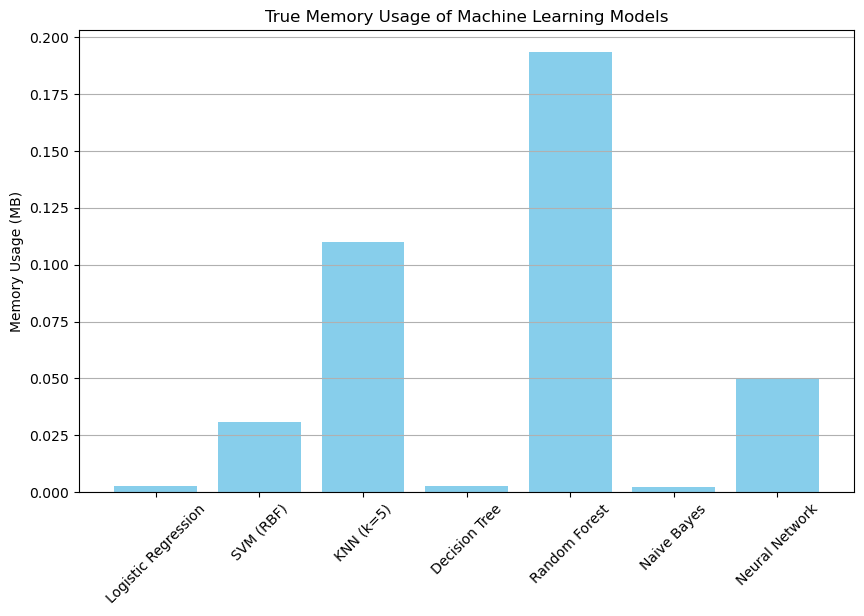

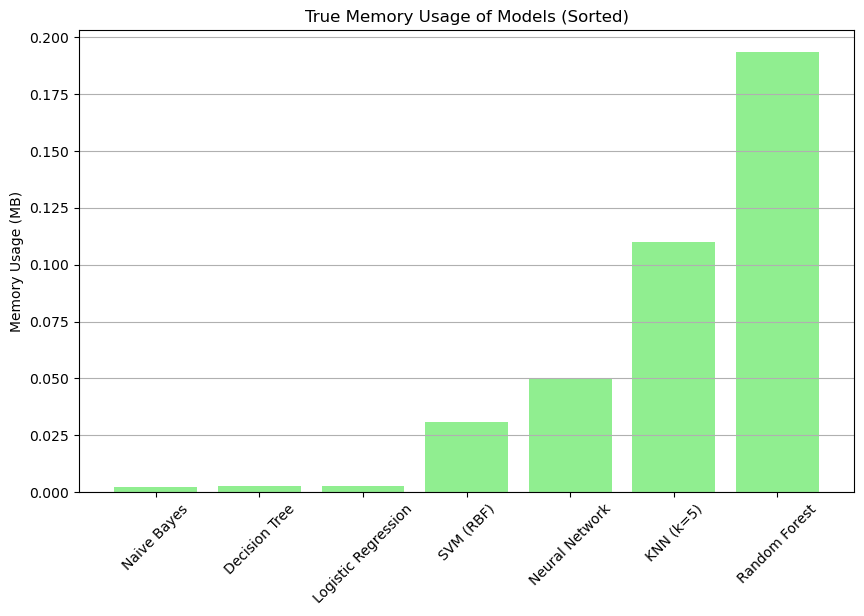

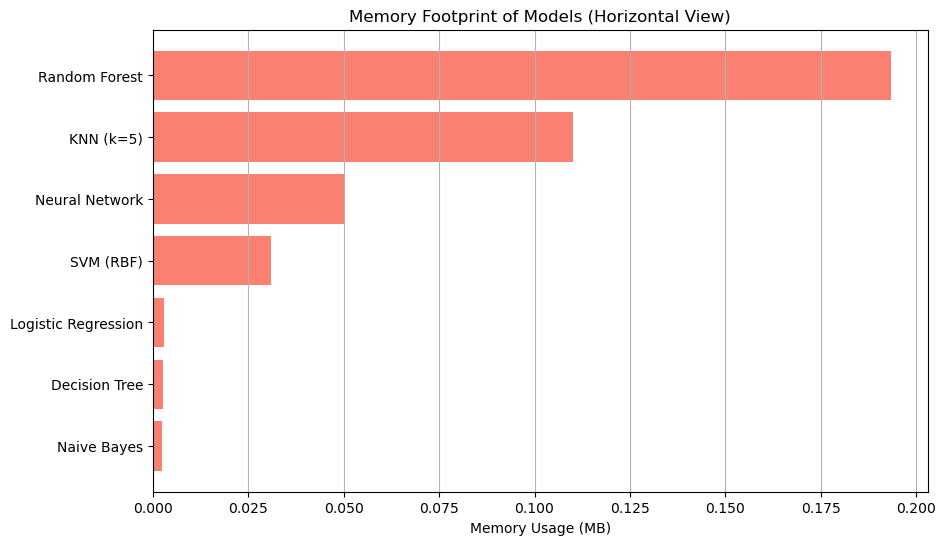

In [ ]:


# ========= BAR PLOT (UNSORTED) =========

plt.figure(figsize=(10,6))
plt.bar(true_memory_usage.keys(), true_memory_usage.values(), color='skyblue')
plt.xticks(rotation=45)
plt.ylabel("Memory Usage (MB)")
plt.title("True Memory Usage of Machine Learning Models")
plt.grid(axis='y')
plt.show()

# ========= SORTED BAR PLOT =========

sorted_mem = dict(sorted(true_memory_usage.items(), key=lambda x: x[1]))

plt.figure(figsize=(10,6))
plt.bar(sorted_mem.keys(), sorted_mem.values(), color='lightgreen')
plt.xticks(rotation=45)
plt.ylabel("Memory Usage (MB)")
plt.title("True Memory Usage of Models (Sorted)")
plt.grid(axis='y')
plt.show()

# ========= HORIZONTAL BAR PLOT =========

plt.figure(figsize=(10,6))
plt.barh(list(sorted_mem.keys()), list(sorted_mem.values()), color='salmon')
plt.xlabel("Memory Usage (MB)")
plt.title("Memory Footprint of Models (Horizontal View)")
plt.grid(axis='x')
plt.savefig("presentation/memory_usage.png")
plt.show()


## Threshold Tuning

In [ ]:


# Use your best-performing model (example: Logistic Regression)
best_model = models["Logistic Regression"]

# Use scaled test data
probs = best_model.predict_proba(X_test_scaled)[:,1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Find optimal threshold using Youden's J statistic
J = tpr - fpr
ix = np.argmax(J)
best_threshold = thresholds[ix]

print("Optimal Threshold =", best_threshold)
print("TPR (Sensitivity) =", tpr[ix])
print("FPR =", fpr[ix])


Optimal Threshold = 0.31539132391503555
TPR (Sensitivity) = 0.9761904761904762
FPR = 0.013888888888888888


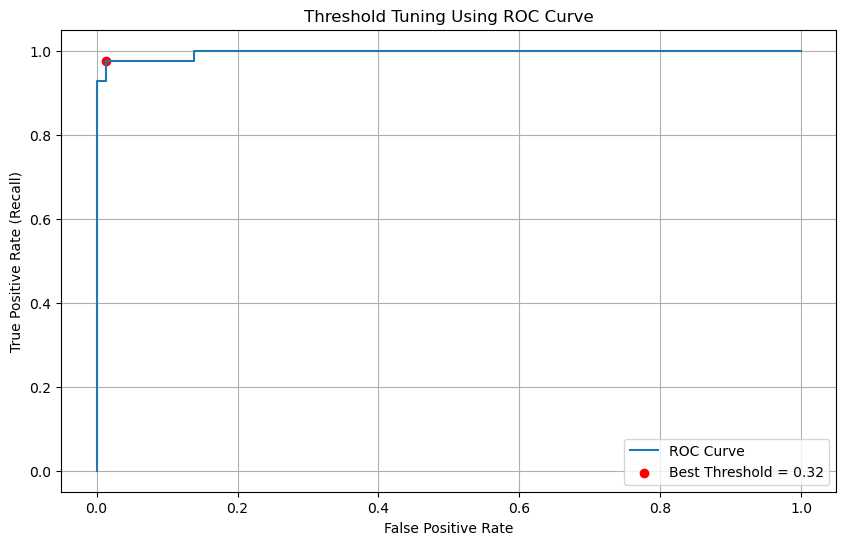

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.scatter(fpr[ix], tpr[ix], color='red', label=f"Best Threshold = {best_threshold:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Threshold Tuning Using ROC Curve")
plt.legend()
plt.grid(True)
plt.savefig("presentation/threshold_tuning.png")
plt.show()



In [ ]:
# Apply threshold
preds_tuned = (probs >= best_threshold).astype(int)

cm = confusion_matrix(y_test, preds_tuned)

print("\nConfusion Matrix (Tuned Threshold):")
print(cm)

print("\nClassification Report (Tuned Threshold):")
print(classification_report(y_test, preds_tuned))



Confusion Matrix (Tuned Threshold):
[[71  1]
 [ 1 41]]

Classification Report (Tuned Threshold):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:


def evaluate_threshold(model, X_test_scaled, y_test):

    # Probabilities for malignant class
    probs = model.predict_proba(X_test_scaled)[:,1]

    # ROC-based best threshold
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    J = tpr - fpr
    best_idx = np.argmax(J)
    best_threshold = thresholds[best_idx]

    # Predictions at threshold 0.50 and tuned threshold
    preds_default = (probs >= 0.50).astype(int)
    preds_tuned   = (probs >= best_threshold).astype(int)

    # Confusion matrices
    cm_default = confusion_matrix(y_test, preds_default)
    cm_tuned   = confusion_matrix(y_test, preds_tuned)

    def metrics(cm, preds):
        tn, fp, fn, tp = cm.ravel()
        return [
            accuracy_score(y_test, preds),
            precision_score(y_test, preds),
            recall_score(y_test, preds),
            f1_score(y_test, preds),
            tn / (tn + fp)  # specificity
        ]

    # Metric tables
    metrics_default = metrics(cm_default, preds_default)
    metrics_tuned   = metrics(cm_tuned, preds_tuned)

    df = pd.DataFrame(
        [metrics_default, metrics_tuned],
        index=["Threshold = 0.50", f"Tuned Threshold = {best_threshold:.2f}"],
        columns=["Accuracy", "Precision", "Recall", "F1-score", "Specificity"]
    )

    return df, best_threshold, fpr, tpr, thresholds, best_idx

# Example for Logistic Regression
table_lr, best_lr_threshold, fpr_lr, tpr_lr, thr_lr, idx_lr = evaluate_threshold(
    models["Logistic Regression"], X_test_scaled, y_test
)

print("===== Logistic Regression Threshold Comparison =====")
print(table_lr)


===== Logistic Regression Threshold Comparison =====
                        Accuracy  Precision    Recall  F1-score  Specificity
Threshold = 0.50        0.964912    0.97500  0.928571   0.95122     0.986111
Tuned Threshold = 0.32  0.982456    0.97619  0.976190   0.97619     0.986111


In [ ]:


model = models["Logistic Regression"]
probs = model.predict_proba(X_test_scaled)[:,1]

def update(threshold):
    preds = (probs >= threshold).astype(int)
    cm = confusion_matrix(y_test, preds)
    tn, fp, fn, tp = cm.ravel()
    recall_val = tp / (tp + fn)
    precision_val = tp / (tp + fp)
    print(f"Threshold = {threshold:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Precision = {precision_val:.3f} | Recall = {recall_val:.3f}")

slider = widgets.FloatSlider(
    min=0.0, max=1.0, step=0.01, value=0.50,
    description='Threshold:'
)

widgets.interact(update, threshold=slider)


interactive(children=(FloatSlider(value=0.5, description='Threshold:', max=1.0, step=0.01), Output()), _dom_cl…

<function __main__.update(threshold)>

In [ ]:
threshold_summary = []

for name, model in models.items():

    # Only models with probability output
    if not hasattr(model, "predict_proba"):
        continue
    
    probs = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    J = tpr - fpr
    best_idx = np.argmax(J)
    best_threshold = thresholds[best_idx]

    preds_default = (probs >= 0.50).astype(int)
    preds_tuned = (probs >= best_threshold).astype(int)

    threshold_summary.append([
        name,
        0.50,
        best_threshold,
        recall_score(y_test, preds_default),
        recall_score(y_test, preds_tuned),
        precision_score(y_test, preds_default),
        precision_score(y_test, preds_tuned)
    ])

threshold_df = pd.DataFrame(
    threshold_summary,
    columns=[
        "Model", "Default Thresh", "Tuned Thresh",
        "Recall (Default)", "Recall (Tuned)",
        "Precision (Default)", "Precision (Tuned)"
    ]
)

print("\n========== Threshold Tuning for All Models ==========")
print(threshold_df)



========== Threshold Tuning for All Models ==========
                 Model  Default Thresh  Tuned Thresh  Recall (Default)  \
0  Logistic Regression             0.5      0.315391          0.928571   
1            SVM (RBF)             0.5      0.444712          0.952381   
2            KNN (k=5)             0.5      0.200000          0.904762   
3        Decision Tree             0.5      1.000000          0.285714   
4        Random Forest             0.5      0.290000          0.119048   
5          Naive Bayes             0.5      0.000010          0.857143   
6       Neural Network             0.5      0.104754          0.904762   

   Recall (Tuned)  Precision (Default)  Precision (Tuned)  
0        0.976190             0.975000           0.976190  
1        0.976190             0.952381           0.953488  
2        0.976190             0.974359           0.872340  
3        0.285714             0.923077           0.923077  
4        0.928571             1.000000           0.9

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


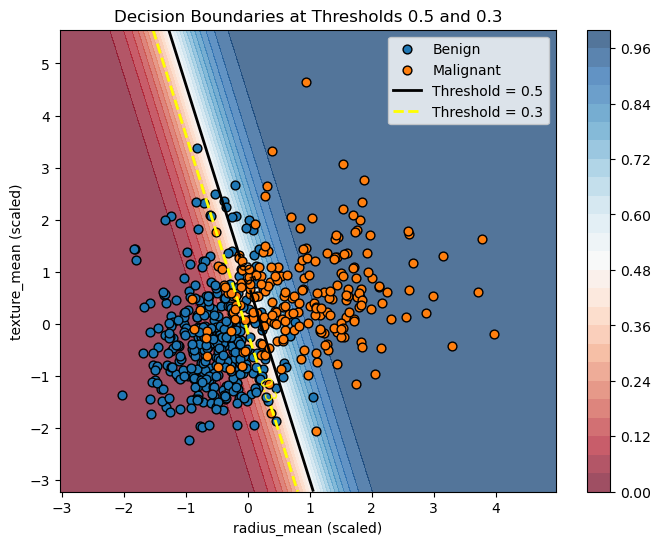

In [ ]:
# Select only 2 features for visualization
X_vis = df[['radius_mean', 'texture_mean']].values

# diagnosis already 0/1, so no need for 'M'
y_vis = df['diagnosis'].astype(int).values

# Standardize
scaler = StandardScaler()
Xv = scaler.fit_transform(X_vis)

# Fit logistic regression
clf = LogisticRegression()
clf.fit(Xv, y_vis)


# Create a meshgrid
x_min, x_max = Xv[:,0].min() - 1, Xv[:,0].max() + 1
y_min, y_max = Xv[:,1].min() - 1, Xv[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict probability over the grid
probs = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
probs = probs.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
contour = plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.7)
plt.colorbar(contour)

# --- Decision boundary at default threshold = 0.5 ---
CS1 = plt.contour(xx, yy, probs, levels=[0.5], 
                  colors='black', linewidths=2, linestyles='solid')
plt.clabel(CS1, fmt={0.5: "0.5"}, inline=True, fontsize=11)

# --- Decision boundary at tuned threshold = 0.3 ---
CS2 = plt.contour(xx, yy, probs, levels=[0.3], 
                  colors='yellow', linewidths=2, linestyles='dashed')
plt.clabel(CS2, fmt={0.3: "0.3"}, inline=True, fontsize=11)

# Scatter points
plt.scatter(Xv[y_vis==0,0], Xv[y_vis==0,1], s=40, edgecolor='k', label='Benign')
plt.scatter(Xv[y_vis==1,0], Xv[y_vis==1,1], s=40, edgecolor='k', label='Malignant')

# Labels
plt.xlabel("radius_mean (scaled)")
plt.ylabel("texture_mean (scaled)")
plt.title("Decision Boundaries at Thresholds 0.5 and 0.3")

# Custom legend
plt.plot([], [], color='black', linewidth=2, label='Threshold = 0.5')
plt.plot([], [], color='yellow', linewidth=2, linestyle='dashed', label='Threshold = 0.3')
plt.legend(loc='best')

plt.savefig("presentation/boundaries_05_03.png")
plt.show()


## Hyperparameter Tuning (GridSearchCV or RandomizedSearchCV)

In [ ]:

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [2000, 5000]
}

grid_lr = GridSearchCV(
    LogisticRegression(),
    param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_lr.fit(X_train_scaled, y_train)

print("🔵 Best Logistic Regression Params:", grid_lr.best_params_)
print("🔵 Best F1:", grid_lr.best_score_)


🔵 Best Logistic Regression Params: {'C': 100, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'lbfgs'}
🔵 Best F1: 0.9612299188450084


In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': ['scale', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(
    SVC(probability=True),
    param_grid_svm,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_svm.fit(X_train_scaled, y_train)

print("🟣 Best SVM Params:", grid_svm.best_params_)
print("🟣 Best SVM F1:", grid_svm.best_score_)


🟣 Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
🟣 Best SVM F1: 0.966960456423372


In [ ]:


param_dist_rf = {
    'n_estimators': randint(50, 400),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

rand_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_dist_rf,
    scoring='f1',
    cv=5,
    n_iter=30,
    n_jobs=-1,
    random_state=42
)

rand_rf.fit(X_train, y_train)

print("🟢 Best RF Params:", rand_rf.best_params_)
print("🟢 Best RF F1:", rand_rf.best_score_)


🟢 Best RF Params: {'max_depth': 17, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 99}
🟢 Best RF F1: 0.9517716523236865


In [ ]:
param_grid_knn = {
    'n_neighbors': list(range(3, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_knn.fit(X_train_scaled, y_train)

print("🟠 Best KNN Params:", grid_knn.best_params_)
print("🟠 Best KNN F1:", grid_knn.best_score_)


🟠 Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
🟠 Best KNN F1: 0.9571023379605469


In [ ]:
param_dist_mlp = {
    'hidden_layer_sizes': [(20,), (30,15), (50,30), (50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': uniform(1e-5, 1e-2),
    'learning_rate_init': uniform(1e-4, 1e-2)
}

rand_mlp = RandomizedSearchCV(
    MLPClassifier(max_iter=2000, random_state=42),
    param_dist_mlp,
    scoring='f1',
    n_iter=25,
    cv=5,
    n_jobs=-1,
    random_state=42
)

rand_mlp.fit(X_train_scaled, y_train)

print("🔴 Best MLP Params:", rand_mlp.best_params_)
print("🔴 Best MLP F1:", rand_mlp.best_score_)


🔴 Best MLP Params: {'activation': 'relu', 'alpha': 0.005218342600258236, 'hidden_layer_sizes': (30, 15), 'learning_rate_init': 0.0033533033076326435, 'solver': 'adam'}
🔴 Best MLP F1: 0.9729465793205916


In [ ]:


# Pipeline: scaling + model
pipe_nb = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", GaussianNB())
])

param_grid_nb = {
    "clf__var_smoothing": np.logspace(-12, -6, 20)
}

grid_nb = GridSearchCV(
    pipe_nb,
    param_grid=param_grid_nb,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_nb.fit(X_train, y_train)

print("🔵 Best Naive Bayes Params:", grid_nb.best_params_)
print("🔵 Best F1 Score:", grid_nb.best_score_)


🔵 Best Naive Bayes Params: {'clf__var_smoothing': 1e-12}
🔵 Best F1 Score: 0.916038360235024


In [ ]:


param_dist_dt = {
    "max_depth": randint(2, 40),
    "min_samples_split": randint(2, 30),
    "min_samples_leaf": randint(1, 20),
    "criterion": ["gini", "entropy", "log_loss"],
    "max_features": [None, "sqrt", "log2"]
}

rand_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_dt,
    n_iter=50,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    random_state=42
)

rand_dt.fit(X_train, y_train)

print("🎯 Best DT Params (Randomized):", rand_dt.best_params_)
print("🎯 Best DT F1:", rand_dt.best_score_)


🎯 Best DT Params (Randomized): {'criterion': 'log_loss', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 12, 'min_samples_split': 9}
🎯 Best DT F1: 0.9231213452285522


In [ ]:


# ============================================================
#   FINAL TUNED MODEL COLLECTION
#   This cell gathers ALL tuned models into final_models
# ============================================================

final_models = {}

# ------------------------------------------------------------
# 1. Logistic Regression
# ------------------------------------------------------------
if "grid_lr" in globals():
    final_models["Logistic Regression"] = grid_lr.best_estimator_
else:
    final_models["Logistic Regression"] = clone(models["Logistic Regression"])


# ------------------------------------------------------------
# 2. SVM (RBF)
# ------------------------------------------------------------
if "grid_svm" in globals():
    final_models["SVM (RBF)"] = grid_svm.best_estimator_
else:
    final_models["SVM (RBF)"] = clone(models["SVM (RBF)"])


# ------------------------------------------------------------
# 3. Random Forest
# ------------------------------------------------------------
if "rand_rf" in globals():
    final_models["Random Forest"] = rand_rf.best_estimator_
else:
    final_models["Random Forest"] = clone(models["Random Forest"])


# ------------------------------------------------------------
# 4. KNN
# ------------------------------------------------------------
if "grid_knn" in globals():
    final_models["KNN"] = grid_knn.best_estimator_
else:
    final_models["KNN"] = clone(models["KNN (k=5)"])


# ------------------------------------------------------------
# 5. Neural Network (MLP)
# ------------------------------------------------------------
if "rand_mlp" in globals():
    final_models["Neural Network"] = rand_mlp.best_estimator_
else:
    final_models["Neural Network"] = clone(models["Neural Network"])


# ------------------------------------------------------------
# 6. Naive Bayes (GaussianNB)
# ------------------------------------------------------------
if "grid_nb" in globals():
    final_models["Naive Bayes"] = grid_nb.best_estimator_
elif "rand_nb" in globals():
    final_models["Naive Bayes"] = rand_nb.best_estimator_
else:
    final_models["Naive Bayes"] = clone(models["Naive Bayes"])


# ------------------------------------------------------------
# 7. Decision Tree
# ------------------------------------------------------------
if "grid_dt" in globals():
    final_models["Decision Tree"] = grid_dt.best_estimator_
elif "rand_dt" in globals():
    final_models["Decision Tree"] = rand_dt.best_estimator_
else:
    final_models["Decision Tree"] = clone(models["Decision Tree"])


# ------------------------------------------------------------
# Show final models
# ------------------------------------------------------------
print("=== FINAL MODELS READY FOR CROSS-VALIDATION ===\n")
for name in final_models:
    print(f"- {name}")


=== FINAL MODELS READY FOR CROSS-VALIDATION ===

- Logistic Regression
- SVM (RBF)
- Random Forest
- KNN
- Neural Network
- Naive Bayes
- Decision Tree


In [ ]:


# ============================================================
#   10-FOLD CROSS-VALIDATION FOR ALL TUNED MODELS
# ============================================================

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Models requiring scaling inside CV
needs_scaling = ["Logistic Regression", "SVM (RBF)", "KNN", "Neural Network", "Naive Bayes"]

cv_summary = []          # summary table (mean/std)
fold_confusions = {}     # confusion matrices per fold
cv_roc_curves = {}       # mean ROC curve per model


for name, model in final_models.items():
    
    print(f"Running CV for: {name} ...")

    # -------------------------------------
    # Create pipeline if scaling is needed
    # -------------------------------------
    if name in needs_scaling:
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("clf", model)
        ])
        X_use = X
    else:
        pipe = model
        X_use = X

    metrics_per_fold = []
    cms = []

    # ROC curve data
    mean_fpr = np.linspace(0, 1, 200)
    tprs = []
    aucs = []

    # -------------------------------------
    # Begin cross-validation
    # -------------------------------------
    for fold_i, (train_idx, test_idx) in enumerate(cv.split(X_use, y), 1):
        
        X_train_cv = X_use.iloc[train_idx]
        y_train_cv = y.iloc[train_idx]
        X_test_cv  = X_use.iloc[test_idx]
        y_test_cv  = y.iloc[test_idx]

        # fit
        pipe.fit(X_train_cv, y_train_cv)

        # predictions
        preds = pipe.predict(X_test_cv)

        # Probability estimate or fallback decision_function
        if hasattr(pipe, "predict_proba"):
            probs = pipe.predict_proba(X_test_cv)[:, 1]
        else:
            raw = pipe.decision_function(X_test_cv)
            # normalize to 0-1
            probs = (raw - raw.min()) / (raw.max() - raw.min() + 1e-9)

        # Metrics
        acc = accuracy_score(y_test_cv, preds)
        prec = precision_score(y_test_cv, preds)
        rec = recall_score(y_test_cv, preds)
        f1 = f1_score(y_test_cv, preds)
        auc_val = roc_auc_score(y_test_cv, probs)

        metrics_per_fold.append([acc, prec, rec, f1, auc_val])

        # Confusion matrix
        cms.append(confusion_matrix(y_test_cv, preds))

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test_cv, probs)
        aucs.append(sk_auc(fpr, tpr))
        tprs.append(np.interp(mean_fpr, fpr, tpr))

    metrics_per_fold = np.array(metrics_per_fold)
    means = metrics_per_fold.mean(axis=0)
    stds  = metrics_per_fold.std(axis=0)

    # Save CV summary
    cv_summary.append([
        name,
        means[0], stds[0],  # Accuracy
        means[1], stds[1],  # Precision
        means[2], stds[2],  # Recall
        means[3], stds[3],  # F1
        means[4], stds[4],  # AUC
    ])

    # Save all confusion matrices
    fold_confusions[name] = cms

    # Save ROC curve (mean)
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = sk_auc(mean_fpr, mean_tpr)
    std_auc  = np.std(aucs)

    cv_roc_curves[name] = (mean_fpr, mean_tpr, mean_auc, std_auc)


# Convert summary to DataFrame
cv_results_df = pd.DataFrame(cv_summary, columns=[
    "Model",
    "Acc_mean", "Acc_std",
    "Prec_mean", "Prec_std",
    "Rec_mean", "Rec_std",
    "F1_mean", "F1_std",
    "AUC_mean", "AUC_std"
])

print("\n========= CROSS-VALIDATION SUMMARY =========\n")
cv_results_df.sort_values("AUC_mean", ascending=False)


Running CV for: Logistic Regression ...
Running CV for: SVM (RBF) ...
Running CV for: Random Forest ...
Running CV for: KNN ...
Running CV for: Neural Network ...
Running CV for: Naive Bayes ...
Running CV for: Decision Tree ...

========= CROSS-VALIDATION SUMMARY =========



,Model,Acc_mean,Acc_std,Prec_mean,Prec_std,Rec_mean,Rec_std,F1_mean,F1_std,AUC_mean,AUC_std
1,SVM (RBF),0.975439,0.019536,0.973647,0.043832,0.962121,0.035583,0.966830,0.025909,0.995637,0.005457
4,Neural Network,0.970175,0.024873,0.964501,0.041488,0.957143,0.058126,0.959303,0.035581,0.992063,0.013174
2,Random Forest,0.947368,0.029356,0.940579,0.050495,0.919697,0.067541,0.927964,0.042548,0.985866,0.017727
5,Naive Bayes,0.931548,0.030788,0.925040,0.066618,0.895671,0.076519,0.906102,0.043642,0.985593,0.011175
3,KNN,0.964850,0.023538,0.977237,0.039640,0.928788,0.057434,0.950867,0.033359,0.984851,0.019292
0,Logistic Regression,0.966667,0.022807,0.963255,0.033201,0.948052,0.054130,0.954468,0.032019,0.984622,0.017032
6,Decision Tree,0.908647,0.032078,0.886223,0.045103,0.872078,0.111056,0.873040,0.059294,0.953865,0.032871
